<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [12.3 Working with Maps](chapter12.03-Working-with-Maps.ipynb) | [Contents](Index.ipynb) | [12.5 Summary and Problems](chapter12.05-Summary-and-Problems.ipynb) >

# Animations and Movies

An animation is a sequence of still frames, or plots, that are displayed in fast enough succession to create the illusion of continuous motion. Animations and movies often convey information better than individual plots. You can create animations in Python by calling a plot function inside of a loop (usually a for-loop). The main tools for making animations in Python is the *matplotlib.animation.Animation* base class, which provides a framework around which the animation functionality is built. Let's see an example.

**TRY IT!** Create an animation of a red circle following a blue sine wave. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

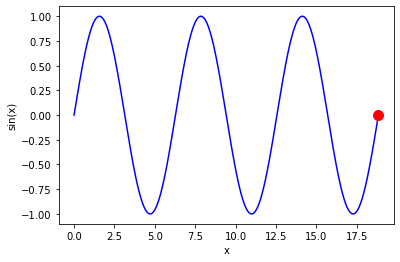

In [5]:
n = 1000
x = np.linspace(0, 6*np.pi, n)
y = np.sin(x)

# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='a red circle following a blue sine wave')
writer = FFMpegWriter(fps=15, metadata=metadata)

# Initialize the movie
fig = plt.figure()

# plot the sine wave line
sine_line, = plt.plot(x, y, 'b')
red_circle, = plt.plot([], [], 'ro', markersize = 10)
plt.xlabel('x')
plt.ylabel('sin(x)')

# Update the frames for the movie
with writer.saving(fig, "writer_test.mp4", 100):
    for i in range(n):
        x0 = x[i]
        y0 = y[i]
        red_circle.set_data(x0, y0)
        writer.grab_frame()

In [4]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="writer_test.mp4" type="video/mp4">
</video></div>""")

Before we make a movie, it is better to prepare the 3 following items first:
1. define the meta data for the movie
2. decide what in the background that no need to change
3. decide the objects that need to change in each movie frame

Once the above items are determined, then making the movie in Python is relatively easy, we only need to do 3 steps:
1. define the meta data for the movie
2. initialize the movie background figure
3. update the frames for the movie

Take the example above, we could clearly see the code related to the 3 steps. 

**1. Define the meta data for the movie**

```python
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='a red circle following a blue sine wave')
writer = FFMpegWriter(fps=15, metadata=metadata)
```
In this block of code, we tell Python that we will start to create a movie writer and give the title, artist, comment to it. Besides, we also tell Python that the rate of the frames in the movie, that is *fps=15*, which means that we display 15 consecutive frames within 1 second (fps stands for frames per second).

**2. Initialize the movie background figure**

```python
fig = plt.figure()

# plot the sine wave line
sine_line, = plt.plot(x, y, 'b')
red_circle, = plt.plot([], [], 'ro', markersize = 10)
plt.xlabel('x')
plt.ylabel('sin(x)')
```

Here, we start to make initialization of the background figure for the movie. The reason we call it background figure is that the stuff we plotted here will not change during the movie, for this example, the sine wave curve will not change. At the same time, we plot an empty red dot (which will not appear on the figure). It serves as a place holder for the things that will change later in the movie, this is equivalent to tell Python that we will have a red point that later I will update the location of the point. Since the x and y axes labels will also not change, therefore, we plotted them here. 

**3. Update the frames for the movie**

```python
with writer.saving(fig, "writer_test.mp4", 100):
    for i in range(n):
        x0 = x[i]
        y0 = y[i]
        red_circle.set_data(x0, y0)
        writer.grab_frame()
```

In this block of code, we specify the name of the output file, format and resolution of the figure (dpi - dots per inch), in this case, we want the output file has a name 'writer_test' with format 'mp4', and we want the dpi of the figure 100. Then we are entering into the core part of the movie making - to update the figure. We use a for-loop to update the figure, and in each loop, we change the location (x, y location) of the red circle. The *writer.grab_frame* function will capture this change in each frame and display it based on the fps we set. 

This is the whole process of making this movie. 

There are many movie examples on [matplotlib movie tutorial](https://matplotlib.org/api/animation_api.html), take a look and run through some of the examples to get a better understanding of making movies in Python. 

<!--NAVIGATION-->
< [12.3 Working with Maps](chapter12.03-Working-with-Maps.ipynb) | [Contents](Index.ipynb) | [12.5 Summary and Problems](chapter12.05-Summary-and-Problems.ipynb) >